<a href="https://colab.research.google.com/github/Abhay87s/Python-ML-projects/blob/main/Handwritten_Digit_recognition_using_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Term Paper Project on 'Gradient based learning for document recognition, Yann Lecun'

Course Project EE656 under Prof. Nischal kumar Verma

 LeNet-5 Architecture based convolutional Neural Network.

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 8.5 MB/s 


Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

Loading MNIST dataset

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [ ]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [ ]:
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

LeNet-5 Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
454/454 [==============================] - 37s 79ms/step - loss: 1.9551 - accuracy: 0.2799 - val_loss: 0.5855 - val_accuracy: 0.8495
Epoch 2/20
454/454 [==============================] - 28s 62ms/step - loss: 0.5131 - accuracy: 0.8392 - val_loss: 0.3468 - val_accuracy: 0.9080
Epoch 3/20
454/454 [==============================] - 28s 62ms/step - loss: 0.3617 - accuracy: 0.8849 - val_loss: 0.2405 - val_accuracy: 0.9290
Epoch 4/20
454/454 [==============================] - 29s 64ms/step - loss: 0.3000 - accuracy: 0.9049 - val_loss: 0.2045 - val_accuracy: 0.9410
Epoch 5/20
454/454 [==============================] - 28s 62ms/step - loss: 0.2608 - accuracy: 0.9173 - val_loss: 0.1737 - val_accuracy: 0.9500
Epoch 6/20
454/454 [==============================] - 28s 62ms/step - loss: 0.2326 - accuracy: 0.9253 - val_loss: 0.1614 - val_accuracy: 0.9575
Epoch 7/20
454/454 [==============================] - 28s 62ms/step - loss: 0.2112 - accuracy: 0.9337 - val_loss: 0.1190 - val_accuracy:

Results

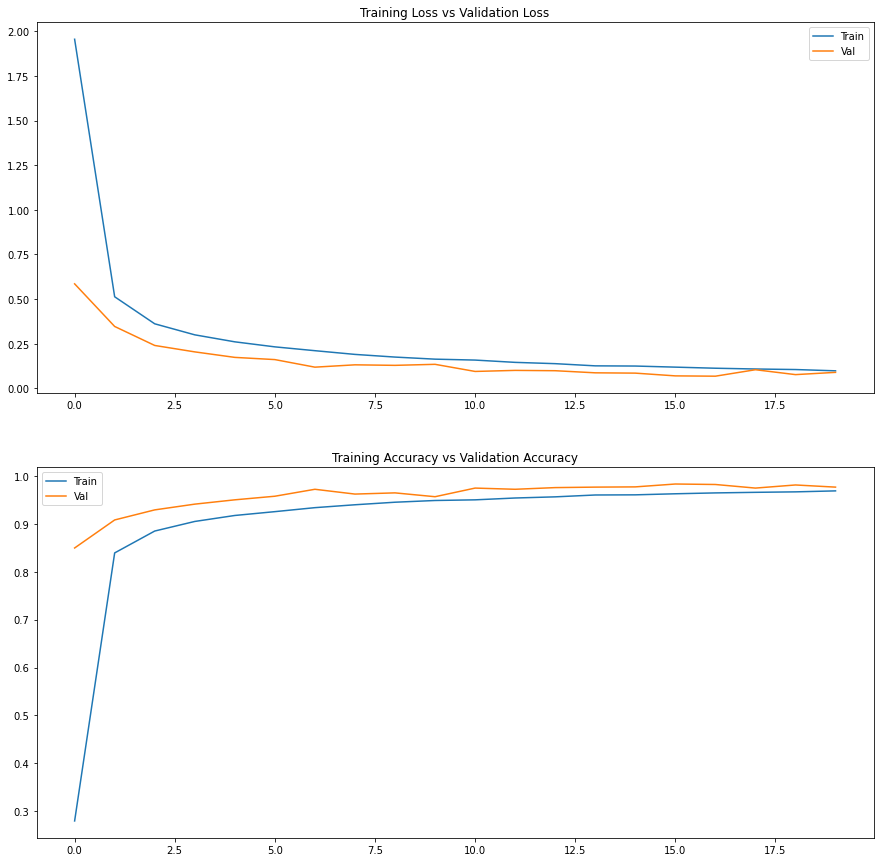

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.1054 - accuracy: 0.9675


[0.10539548099040985, 0.9674999713897705]